**Column Details**
- **Date**: The trading date of the stock.
- **Open**: The price at which the stock opened on a given day.
- **High**: The highest price reached by the stock during the trading day.
- **Low**: The lowest price reached by the stock during the trading day.
- **Close**: The final price of the stock at market close.
- **Adj Close**: The closing price adjusted for splits and dividends.
- **Volume**: The total number of shares traded on that day.


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/content/RELIANCE.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
1,2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2,2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
3,2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
4,2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0


In [3]:
df.shape

(2634, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2634 entries, 0 to 2633
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2634 non-null   object 
 1   Open       2634 non-null   float64
 2   High       2634 non-null   float64
 3   Low        2634 non-null   float64
 4   Close      2634 non-null   float64
 5   Adj Close  2634 non-null   float64
 6   Volume     2634 non-null   float64
dtypes: float64(6), object(1)
memory usage: 144.2+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2.634000e+03
mean,593.500057,600.787471,586.714278,593.416973,556.435824,8.622828e+06
std,264.054719,266.530348,261.098518,263.770466,278.365257,5.485415e+06
min,0.000000,286.250000,266.250000,269.388000,222.757553,0.000000e+00
25%,432.568741,437.500000,426.962509,432.125000,391.739197,5.316242e+06
50%,497.174988,502.500000,491.550003,496.649994,445.431839,7.126298e+06
75%,556.181259,565.875000,546.812500,554.640991,524.052490,1.009307e+07
max,1407.949951,1417.500000,1402.650024,1408.849976,1401.091064,8.624427e+07


In [6]:
#Setting dat as index
df.index = pd.to_datetime(df['Date'])
#dropping the date column since it is already set as index
df = df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0


In [7]:
# Creating predictior variables
df['open-close'] = df['Open'] - df['Close']
df['high-low'] = df['High'] - df['Low']

In [8]:
# Feature extraction
x = df[['open-close', 'high-low']]
x.head()

,open-close,high-low
Date,,
2009-01-02,-6.675018,11.975006
2009-01-05,-16.712006,20.475006
2009-01-06,-2.725006,14.687988
2009-01-07,42.062012,52.750000
2009-01-09,14.187988,29.087006


In [11]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 0, ..., 1, 0, 0])

In [12]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# train data
x_train = x[:split]
y_train = y[:split]

#test data set
x_test = x[split:]
y_test = y[split:]

In [13]:
cls = SVC()
cls.fit(x_train, y_train)

SVC()

In [14]:
df['predicted_signal'] = cls.predict(x)

In [32]:
print(y_train)

[1 1 0 ... 1 1 0]


In [35]:
#model evaluation
print("Training Accuracy: ",accuracy_score(y_train, cls.predict(x_train)))
print("Testing Accuracy: ",accuracy_score(y_test, cls.predict(x_test)))

Training Accuracy:  0.5358329378262933
Testing Accuracy:  0.47248576850094876


In [15]:
df['return'] = df['Close'].pct_change()

In [16]:
df['strategy_return'] = df['return']*df['predicted_signal'].shift(1)

In [17]:
df['cum-ret'] = df['return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low,predicted_signal,return,strategy_return,cum-ret
Date,,,,,,,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0,-6.675018,11.975006,0,NaN,NaN,NaN
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0,-16.712006,20.475006,1,0.061760,0.000000,0.061760
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0,-2.725006,14.687988,0,0.003699,0.003699,0.065459
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0,42.062012,52.750000,0,-0.124114,-0.000000,-0.058655
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0,14.187988,29.087006,0,-0.039562,-0.000000,-0.098217
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0,-1.549927,19.849976,1,-0.000245,-0.000245,1.774621
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0,-11.900024,17.500000,1,0.009982,0.009982,1.784603
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0,24.650024,34.750000,1,-0.019483,-0.019483,1.765120


In [18]:
df['cum_strategy'] = df['strategy_return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low,predicted_signal,return,strategy_return,cum-ret,cum_strategy
Date,,,,,,,,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0,-6.675018,11.975006,0,NaN,NaN,NaN,NaN
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0,-16.712006,20.475006,1,0.061760,0.000000,0.061760,0.000000
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0,-2.725006,14.687988,0,0.003699,0.003699,0.065459,0.003699
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0,42.062012,52.750000,0,-0.124114,-0.000000,-0.058655,0.003699
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0,14.187988,29.087006,0,-0.039562,-0.000000,-0.098217,0.003699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0,-1.549927,19.849976,1,-0.000245,-0.000245,1.774621,1.747285
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0,-11.900024,17.500000,1,0.009982,0.009982,1.784603,1.757267
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0,24.650024,34.750000,1,-0.019483,-0.019483,1.765120,1.737784


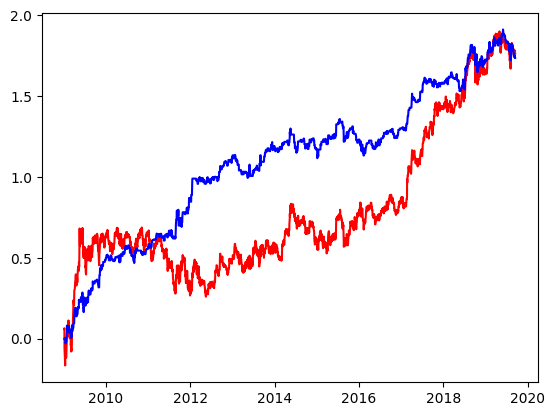

In [23]:
plt.plot(df['cum-ret'], color='red')
plt.plot(df['cum_strategy'], color='blue')

Thank you for going through my work till the end, feel free to get in touch if you have any questions... :)